In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def createGraphs(aoclVec, refVec, myVec, mVec, title, xlabel, ylabel, fileName):
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(mVec,aoclVec,label="AOCL")
    ax.plot(mVec,refVec,label="Reference")
    ax.plot(mVec,myVec,label="DORGKR")
    ax.legend()
    fig.show()
    fig.savefig(fileName)

/tmp/ipykernel_23014/1752098434.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23014/1752098434.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


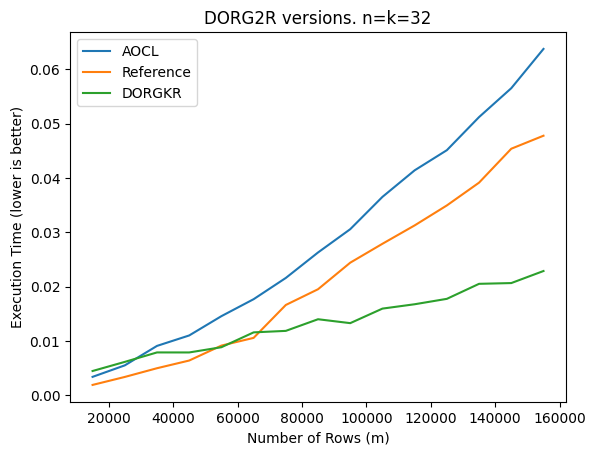

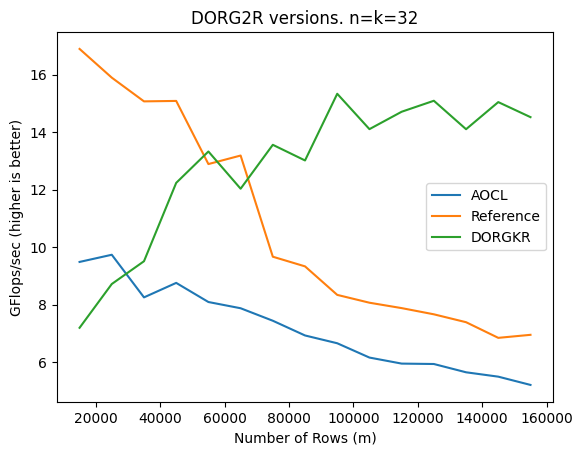

In [3]:
# This notebook/script is responsible for parsing the timing files.

file = open("coarseResultsNB.txt")
lines = file.readlines()

aoclTime = []
referenceTime = []
dorgkrTime = []

aoclFlop = []
referenceFlop = []
dorgkrFlop = []
appendedAOCL = True
appendedREF = True
appendedMy = True
mVec = []
nRep = 0
for line in lines:
    # Skips over headers that are mostly used for when a user reads the test files
    # manually
    if(line[0] =='T'):
        continue
    # This line is telling us the parameters passed into our test function
    if(line[1]=='='):
        lineVec = line.split()
        tmp = int(lineVec[0][2:])
        mVec.append(tmp)
        appendedAOCL = False
        appendedREF = False
        appendedMy = False
        continue
    # This is very inefficient, but is an easy way to accomplish what we are doing
    lineVec = line.split(":")
    # If the file is not formatted correctly, the following will cause problems.
    typeChar = lineVec[0]
    time = float(lineVec[1])
    flop = float(lineVec[2])
    # We are writing to our file in the form
    # functionChar:time:flop count
    if(typeChar=='k'):
        # my version
        if (not appendedMy):
            dorgkrTime.append(time)
            dorgkrFlop.append(flop)
            appendedMy = True
        else:
            if (dorgkrTime[-1] < time):
                dorgkrTime[-1] = time
                dorgkrFlop[-1] = flop
    elif(typeChar == 'a'):
        # aocl version
        if (not appendedAOCL):
            aoclTime.append(time)
            aoclFlop.append(flop)
            appendedAOCL = True
        else:
            if (aoclTime[-1] < time):
                aoclTime[-1] = time
                aoclFlop[-1] = flop
    elif(typeChar == 'r'):
        # reference version
        if (not appendedREF):
            referenceTime.append(time)
            referenceFlop.append(flop)
            appendedREF = True
        else:
            if (referenceTime[-1] < time):
                referenceTime[-1] = time
                referenceFlop[-1] = flop
createGraphs(aoclTime, referenceTime, dorgkrTime, mVec, "DORG2R versions. n=k=32", "Number of Rows (m)", "Execution Time (lower is better)", "dorg2rNBTime.pdf")
createGraphs(aoclFlop, referenceFlop, dorgkrFlop, mVec, "DORG2R versions. n=k=32", "Number of Rows (m)", "GFlops/sec (higher is better)", "dorg2rNBFlop.pdf")

# Note
Even though our plots above may seem counterintuitive as the GFlops drop as m increases for the reference and optimized versions of dorgkr. This can be explained by the fact that the operation count is linear in m, so if our execution time increases super linearly, then we will see this ratio drop.

In addition, even though reference dorg2r beats AOCL's version, this is only for the case of m >> n. However if we compare for cases of m = n or m \approx n (graphs below) AOCL does beat reference, which is a good sign we linked our test files correctly.